# Visualizing Categorical Data

When visualizing the statistic relationships, the main relationship was between two numerical variables.

If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, **`catplot()`**, that gives unified higher-level access to them.

The different categorical plot kinds belong to three different families, which are:

Categorical scatterplots:
*   `stripplot()` (with `kind="strip"`; the default)
*   `swarmplot()` (with `kind="swarm"`)

Categorical distribution plots:
*   `boxplot()` (with `kind="box"`)
*   `violinplot()` (with `kind="violin"`)
*   `boxenplot()` (with `kind="boxen"`)

Categorical estimate plots:
*   `pointplot()` (with `kind="point"`)
*   `barplot()` (with `kind="bar"`)
*   `countplot()` (with `kind="count"`)

The figure-level interface `catplot()` is a higher-level interface to each of the functions above.



In [ ]:
# import seaborn
import seaborn as sns

# set seaborn theme
sns.set_theme(style="darkgrid")

In the following, we will use the seaborn built-in dataset named “tips”.

In [ ]:
# load dataframe
tips = sns.load_dataset('tips')

# return first rows of dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Categorical scatterplots

The default representation of the data in **`catplot()`** uses a scatterplot.

The main challenge in representing categorical data with a scatter plot is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable.

To resolve this challenge, the two different categorical scatter plots in seaborn, namely `stripplot()` and `swarmplot()`, take different approaches.

The approach used by `stripplot()`, which is the default “kind” in `catplot()`, is to adjust the positions of points on the categorical axis with a small amount of random “jitter”.

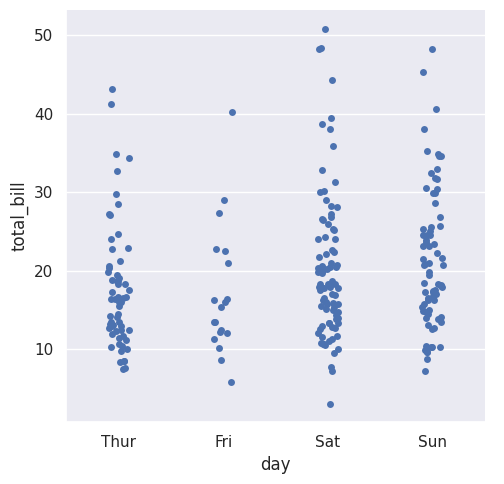

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill")

The `jitter` parameter controls the magnitude of jitter or disables it altogether:

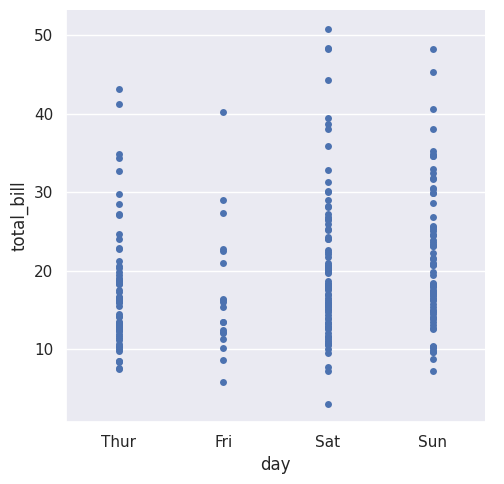

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

The approach used by `swarmplot()` adjusts the points along the categorical axis using an algorithm that prevents them from overlapping.

It can give a better representation of the distribution of observations, although it only works well for relatively small datasets.

`swarmplot()` is activated by setting `kind="swarm"` in `catplot()`.

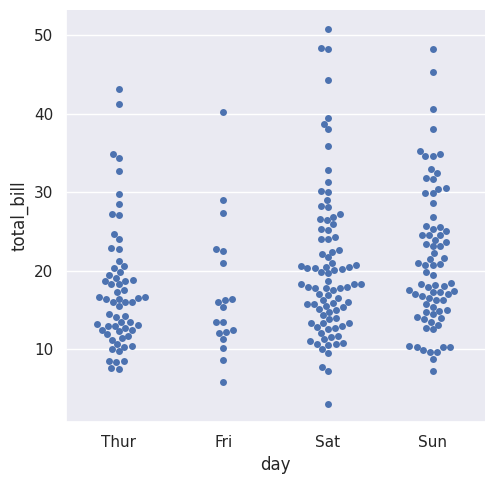

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

It’s possible to add another dimension to a categorical plot by using a `hue` semantic.

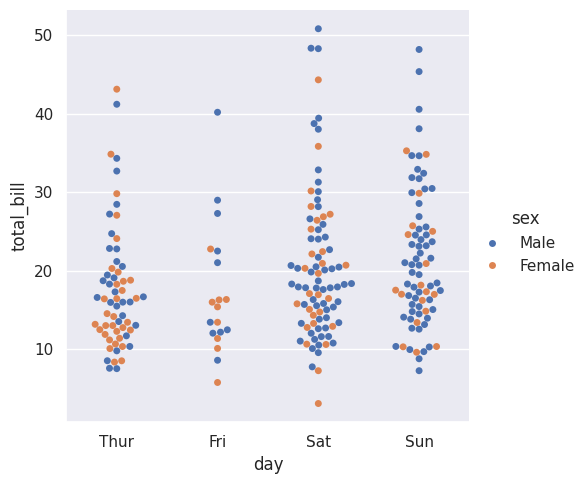

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

We can put the categorical variable on the vertical axis, particularly when the category names are relatively long or there are many categories.

To do this, swap the assignment of variables to axes.

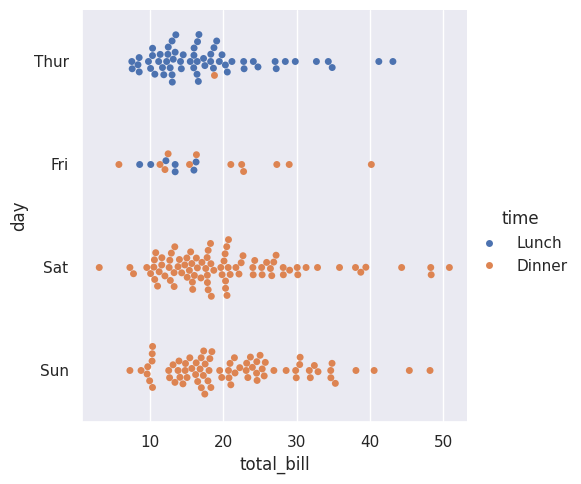

In [ ]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

# Comparing distributions

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category.

When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

# Box Plot

A box plot is a standard way of displaying data distribution based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.

The first quartile (also known as the 25th percentile) is the value below which 25% of the observations in the dataset fall, while the third quartile (also known as the 75th percentile) is the value below which 75% of the observations in the dataset fall.

## Elements of a Box Plot

The figure below shows the elements of a box plot:

course-matplotlib-boxplot-01-text2path.svg

A typical box plot comes with several elements as part of its anatomy:

* **Median**: This is the middle value of the data, represented by a line within the box.
* **Box**: This represents the data's Interquartile Range (IQR), which represents the range between Q1 and Q3. The bottom and top edges represent Q1 and Q3, respectively.
* **Whiskers**: These are lines that extend from either end of the box to represent the minimum and maximum values, excluding any outliers.
* **Outliers**: These are points outside the whiskers considered unusual or extreme compared to the rest of the data.
* **Caps**: These are lines at the ends of the whiskers, representing the minimum and maximum values, including any outliers.

These elements combine to give the box plot statistical meaning and allow easy visual comparisons between different data groups.

Below is a figure showing how the box plot mas on to the normal distribution with a standard deviation $\sigma$, which is a helpful way to think about interpreting box plots.

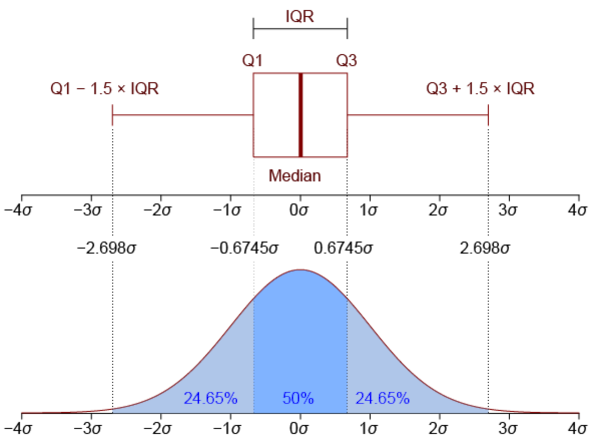

Any points plotted outside the whiskers are considered outliers.

The idea behind this is that the whiskers end at what might reasonably be predicted to reflect the minimum and maximum values in the distribution, and any outliers are likely to be inaccurate measurements or other types of “noise”.

## What a Box Plot Tells You

**Central Tendency**

The median, represented by the line inside the box, provides a measure of the center of the data.

**Spread**

The box and whiskers show how spread out the data is. A wider box and whiskers indicate greater variability.

**Skewness**

The box plot can reveal whether the data is symmetrical or skewed. If the median is not in the center of the box, or if the whiskers are of different lengths, it suggests the data is skewed.

**Outliers**

The box plot helps identify any outliers in the data.

## Spread

Spread is the extent to which a distribution is stretched or squeezed.

In the above plot, the normal distribution with a higher standard deviation ($\sigma = 1.5$) is stretched and the normal distribution with a lower standard deviation ($\sigma = 0.5$) is squeezed.

## Skewness

The box plot shape will show if a data set is normally distributed or skewed.

course-matplotlib-boxplot-03.svg

When the median is in the middle of the box, and the whiskers are about the same on both sides of the box, then the distribution is symmetric.

When the median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, then the distribution is positively skewed (skewed right).

When the median is closer to the top of the box, and if the whisker is shorter on the upper end of the box, then the distribution is negatively skewed (skewed left).

## How to Interpret a Box Plot

* Compare groups: Box plots are particularly useful for comparing the distributions of different groups of data.
* Identify patterns: Box plots can help identify patterns and trends in the data.
* Make informed decisions: By understanding the distribution of the data, you can make more informed decisions.

In summary, a box plot is a valuable tool for visualizing and summarizing the distribution of numerical data.


The "box" shows the **interquartile range** (IQR) — the range between the 25th and 75th percentiles of the data. In other words, half of the data falls within this box.

The line inside the box represents the **median**, or the value exactly in the middle of all the values in the data set.

The whiskers (lines extending out from the box) end at ±1.5 x the IQR, and then any points plotted outside the whiskers are considered outliers.

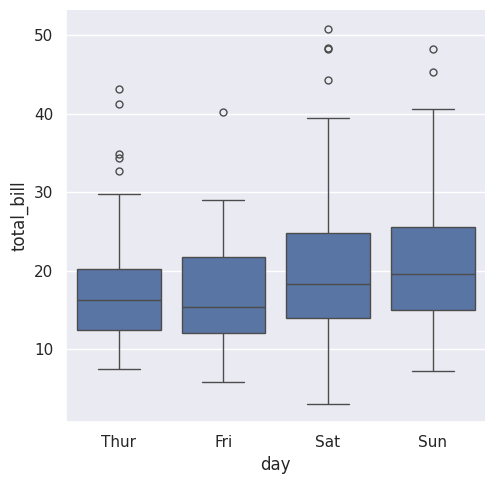

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

When adding a `hue` semantic, the box for each level of the semantic variable is made narrower and shifted along the categorical axis.

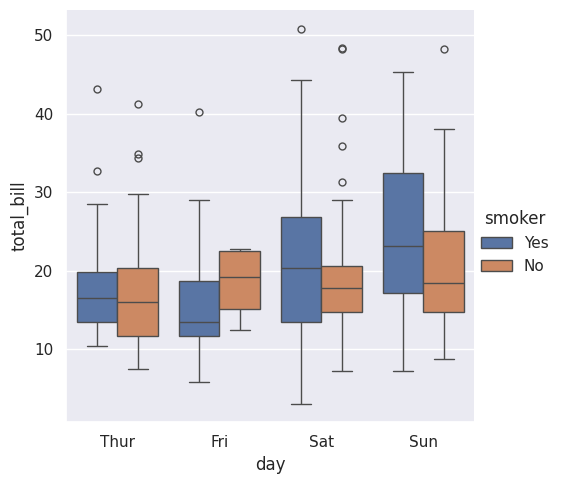

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

## Violinplots

A different approach is a **`violinplot()`**, which combines a boxplot with the kernel density estimation procedure described in the distributions section.

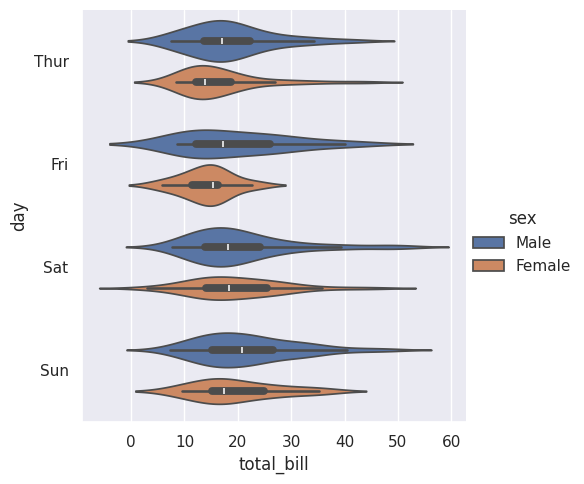

In [ ]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whisker values from the boxplot are shown inside the violin.

There are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values.

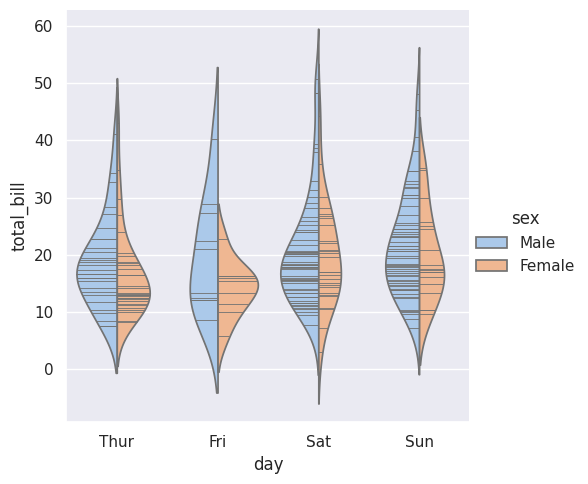

In [ ]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)

It can also be useful to combine `swarmplot()` or `stripplot()` with a box plot or violin plot to show each observation along with a summary of the distribution.

<Axes: xlabel='day', ylabel='total_bill'>

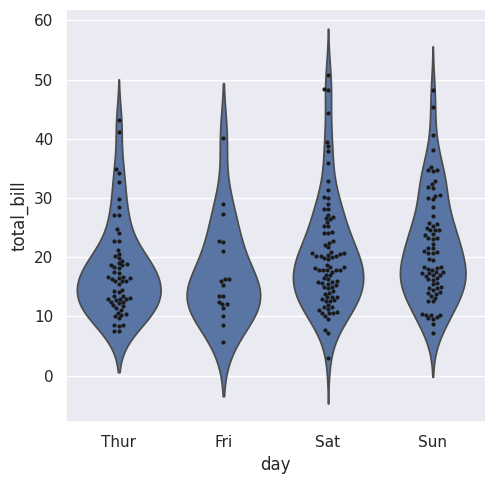

In [ ]:
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

# Estimating central tendency

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values.

Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.

In the following, we will use the seaborn built-in dataset named “titanic”.

In [ ]:
# load dataframe
titanic = sns.load_dataset('titanic')

# return first rows of dataframe
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Bar plots

A familiar style of plot that accomplishes this goal is a bar plot.

In seaborn, the **`barplot()`** function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default).

When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars.

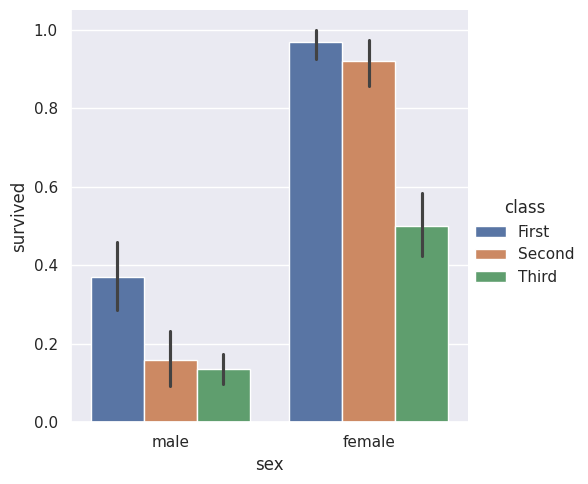

In [ ]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

The default error bars show 95% confidence intervals: `errorbar=("ci", 95)`.

But it is possible to select from a number of other representations, for example error bars showing 95% percentile intervals: `errorbar=("pi", 95)`.

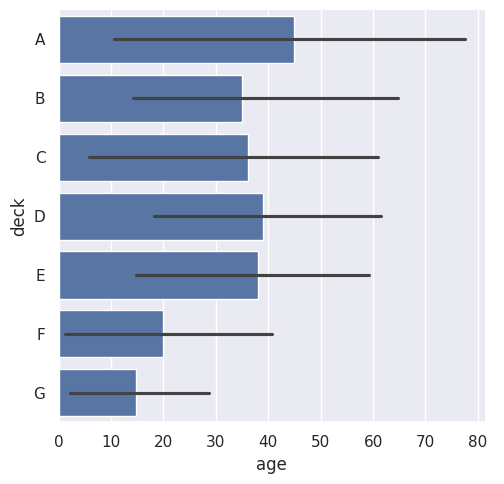

In [ ]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable.

This is similar to a histogram over a categorical, rather than quantitative, variable.

It’s easy to do so with the **`countplot()`** function.

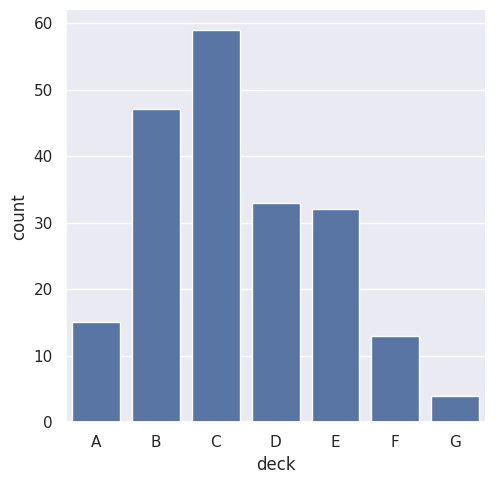

In [ ]:
sns.catplot(data=titanic, x="deck", kind="count")

Both `barplot()` and `countplot()` can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function.

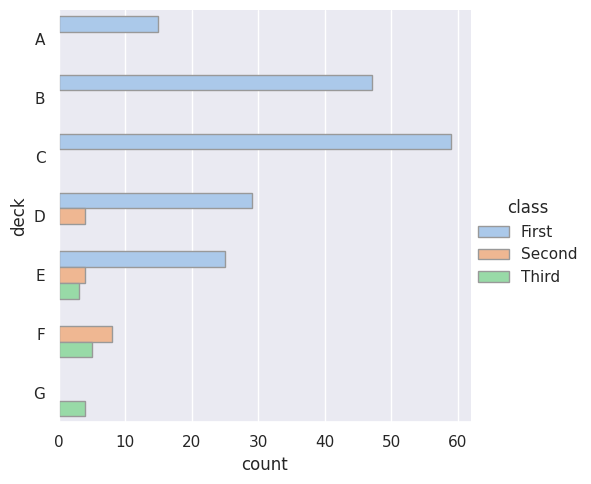

In [ ]:
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

## Point plots

An alternative style for visualizing the same information is offered by the **`pointplot()`** function.

This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval.

Additionally, `pointplot()` connects points from the same `hue` category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes.

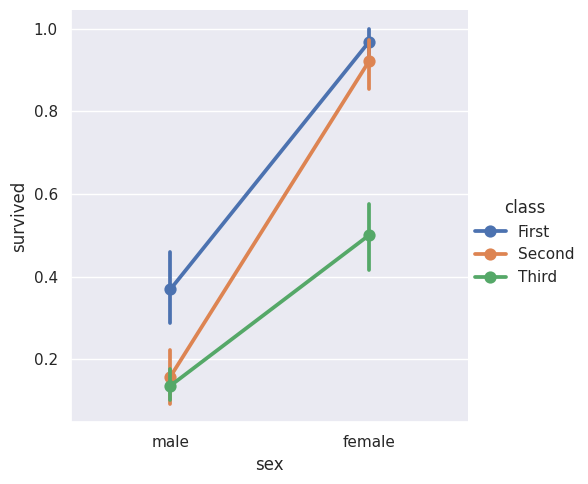

In [ ]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

# Showing additional dimensions

Just like `relplot()`, the fact that `catplot()` is built on a `FacetGrid` means that it is easy to add faceting variables to visualize higher-dimensional relationships.

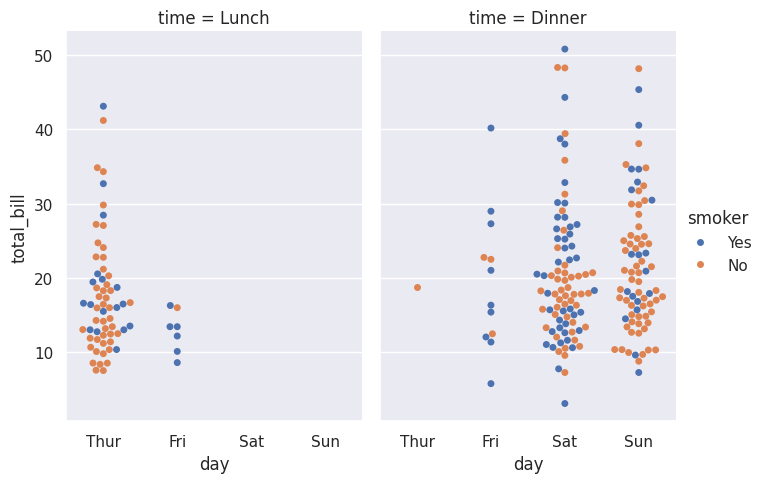

In [ ]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)